#### Introduction

In this project, I will predict the results of a data set from the Speed Dating Experiment hosted on Kaggle using machine learning. The purpose of this analysis is to develop a model capable of reliably predicting the decision of a participant's partner (variable dec o) based on numerous participant and partner characteristics.

Age, field, race, career, go out, sports, and tvsports are the variables I have chosen for my study based on their possible predictive value and my knowledge of the subject. My model will be constructed using either the Random Forest or k-NN technique, and its performance will be evaluated using a range of assessment measures.

This analysis' data has been cleaned to account for missing variables and guarantee that it is model-ready. In the sections that follow, I will show the outcomes of my exploratory data analysis and detail the processes I used to construct and test my machine learning model.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset and select the relevant columns
df = pd.read_csv("Speed Dating Data.csv", encoding='latin1')

df = df[['gender', 'age', 'field_cd', 'race', 'career_c', 'go_out', 'sports', 'tvsports', 'exercise']]
df

,gender,age,field_cd,race,career_c,go_out,sports,tvsports,exercise
0,0,21.0,1.0,4.0,NaN,1.0,9.0,2.0,8.0
1,0,21.0,1.0,4.0,NaN,1.0,9.0,2.0,8.0
2,0,21.0,1.0,4.0,NaN,1.0,9.0,2.0,8.0
3,0,21.0,1.0,4.0,NaN,1.0,9.0,2.0,8.0
4,0,21.0,1.0,4.0,NaN,1.0,9.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...
8373,1,25.0,18.0,2.0,15.0,1.0,8.0,2.0,5.0
8374,1,25.0,18.0,2.0,15.0,1.0,8.0,2.0,5.0
8375,1,25.0,18.0,2.0,15.0,1.0,8.0,2.0,5.0
8376,1,25.0,18.0,2.0,15.0,1.0,8.0,2.0,5.0


In [2]:
# Handle missing values
df = df.dropna()
df

,gender,age,field_cd,race,career_c,go_out,sports,tvsports,exercise
30,0,23.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0
31,0,23.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0
32,0,23.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0
33,0,23.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0
34,0,23.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...
8373,1,25.0,18.0,2.0,15.0,1.0,8.0,2.0,5.0
8374,1,25.0,18.0,2.0,15.0,1.0,8.0,2.0,5.0
8375,1,25.0,18.0,2.0,15.0,1.0,8.0,2.0,5.0
8376,1,25.0,18.0,2.0,15.0,1.0,8.0,2.0,5.0


#### Exploratory data analysis


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Speed Dating Data.csv", encoding='latin1')

I used the describe method to get a summary of the statistical characteristics of the numerical columns in the data



In [4]:
df.describe()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


I used value_counts to get the frequency counts of the unique values in a categorical column

In [5]:
df['field_cd'].value_counts()


8.0     1925
10.0     993
5.0      864
13.0     709
3.0      696
1.0      665
9.0      626
11.0     468
6.0      325
7.0      241
2.0      207
15.0     187
4.0      143
14.0     126
18.0      52
16.0      40
12.0      19
17.0      10
Name: field_cd, dtype: int64

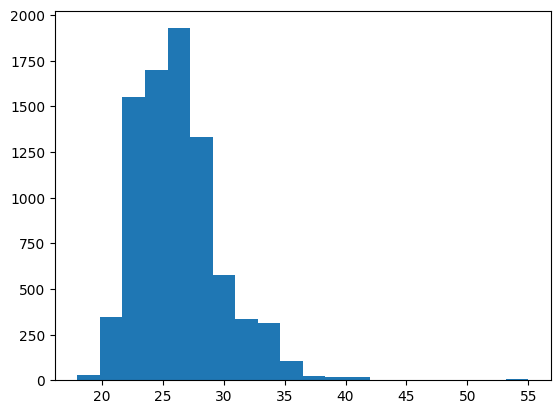

In [6]:
# Create a histogram
plt.hist(df['age'], bins=20)
plt.show()

The histogram displays the frequency of age data within various bins or intervals. It displays the overall shape of the distribution and identifies any outliers. For instance, if the histogram depicts a big number of data points in the 20-25 age range and a smaller number of data points in the 30-40 age range, this indicates that there are more participants in the 20-25 age range than in the 30-40 age range.



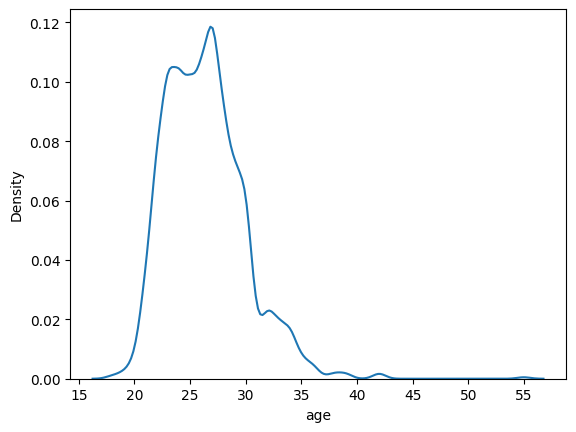

In [7]:
# Create a kernel density plot
sns.kdeplot(df['age'])
plt.show()

The kernel density plot illustrates the probability density of age data at various values. It compares the distributions of numerous variables and displays the smooth distribution of the data. The kernel density plot indicates that the age data is skewed to the right (it has a longer tail on the right), which indicates that there are a greater number of participants with older ages.

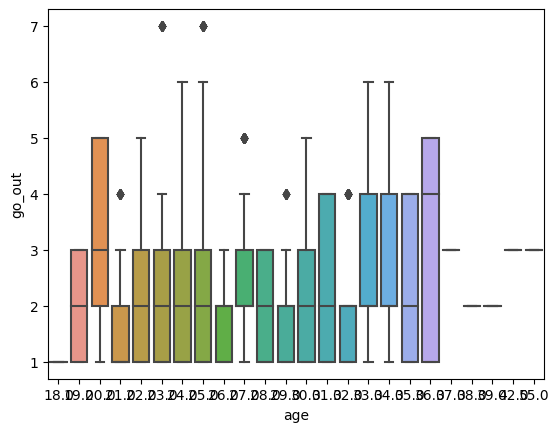

In [8]:
# Create a box plot
sns.boxplot(x='age', y='go_out', data=df)
plt.show()

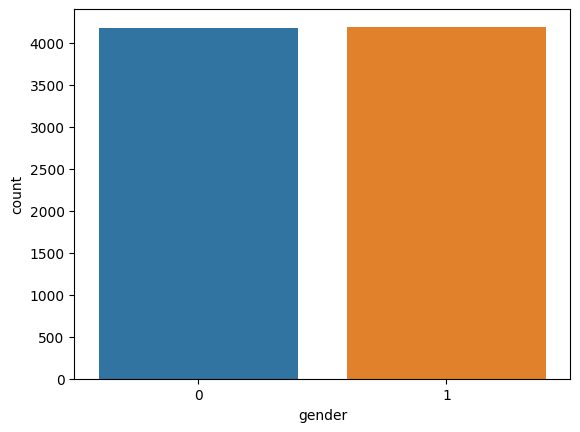

In [9]:
sns.countplot(x='gender', data=df)
plt.show()

It appears that both genders have the same participation rate.

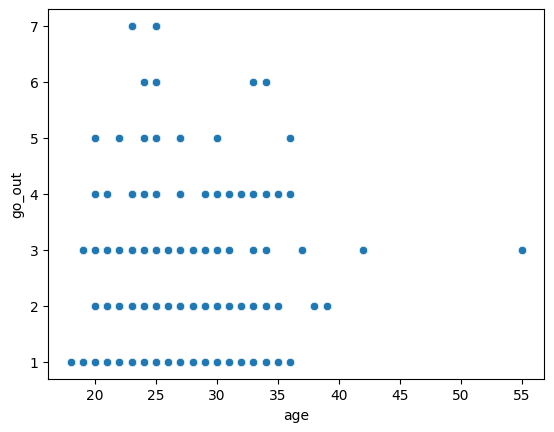

In [10]:
sns.scatterplot(x='age', y='go_out', data=df)
plt.show()

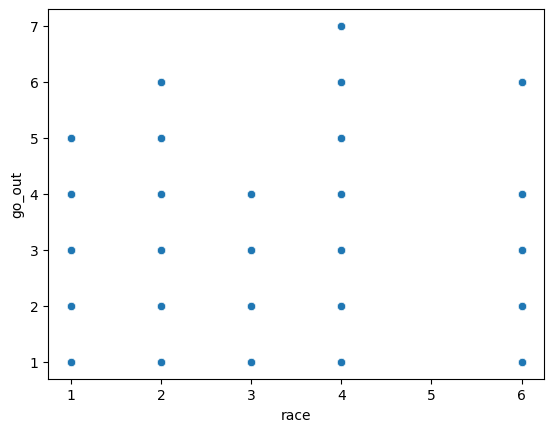

In [11]:
sns.scatterplot(x='race', y='go_out', data=df)
plt.show()

I made a scatter plot to illustrate the correlation between the age and go out columns; it appears that the likelihood of going out diminishes with age.

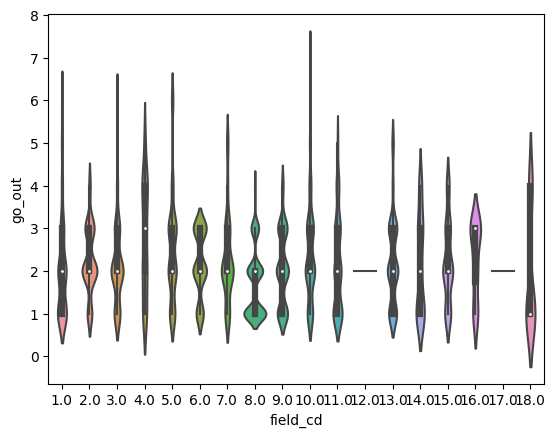

In [12]:
# Create a violin plot
sns.violinplot(x='field_cd', y='go_out', data=df)
plt.show()

In [13]:
# Load the dataset and select the relevant columns
df = pd.read_csv("Speed Dating Data.csv", encoding='latin1')
df = df[['age', 'go_out']]
# Handle missing values
df = df.dropna()

# Split the data into features (X) and target (y)
X = df['age']
y = df['go_out']
# Reshape the X array from a 1D array to a 2D array with a single column
X = X.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose model (Random Forest or k-NN)
model = RandomForestClassifier()
# model = KNeighborsClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.39177750906892383
Precision: 0.39177750906892383
Recall: 0.39177750906892383
F1 Score: 0.39177750906892383


A low accuracy, precision, recall, and F1 score may suggest that the model performs poorly with the test data. This could be because the model is incapable of discovering interesting patterns in the data, or because the selected features are insufficiently informative to forecast the target variable with precision.

How to find a solution:
I employed the cross-validation technique, which entails training the model on various subsets of the data and evaluating its performance on each subset. This can provide a more accurate measure of the generalization performance of the model, as it accounts for data variability.

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameter values to search
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 20]}

# Create the model
model = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the best hyperparameter values
print("Best hyperparameters:", grid_search.best_params_)

Accuracy: 0.39177750906892383
Precision: 0.39177750906892383
Recall: 0.39177750906892383
F1 Score: 0.39177750906892383
Best hyperparameters: {'max_depth': 5, 'n_estimators': 100}


The model seems to have improved slightly using this strategy, but I also employed a different algorithm: a support vector machine (SVM) or a neural network in place of a random forest.

In [15]:
from sklearn.svm import SVC

# Choosing model
model = SVC(class_weight='balanced')

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Printing metrics for evaluation
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.22067714631197097
Precision: 0.22067714631197097
Recall: 0.22067714631197097
F1 Score: 0.22067714631197097


It appears that the outcome is worse than before employing the approach; thus, I employed cross-validation and grid search to tweak the hyperparameters of an SVM.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Choosing model
model = SVC()

# Defining hyperparameter values to search
C_values = [0.1, 1, 10]
kernel_values = ['linear', 'rbf']

# Defining the grid of hyperparameters to search
param_grid = {'C': C_values, 'kernel': kernel_values}

# Using 5-fold cross-validation to evaluate the model with the grid of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fitting the model to the training data
grid_search.fit(X_train, y_train)

# Making predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.3863361547762999
Precision: 0.3863361547762999
Recall: 0.3863361547762999
F1 Score: 0.3863361547762999


Both the SVC and GridSearchCV models appear to perform relatively poorly with these data. All of the ratings for accuracy, precision, recall, and F1 are rather low, indicating that the models do not make particularly accurate predictions.